Additional notes:
- look at minh's final eda
- re-incorporate the single artist metrics
- include boxplots where able
    - maybe even do boxplot trendlines
- interactive network visualization
- include statistical tests?
- fix position in dash application

Minh, Can you help with these things?
- Add correct title pages here. 
- Update title pages on Google wireframes.
- Add in some basic text to the wireframes (maybe?)
- Flesh out narrative here. 
- Update Profit to Revenue. 
- Get wireframes to practically perfect for submission. 
- Check axises and whether we should flip them.
    - To flip x axis: [plot variable labe].invert_xaxis()
    - To flip y-axis: [plot variable labe].invert_yaxis()
    - Add before the axis labels... 
- Check label names and ensure that they are cohesive throughout. 
- Can you check the drop duplicates... 
    - used track name but there may be a better solution. 
    - may not have used it everywhere it is necessary. 
- I added in some basic count plots to show how representative certain things are in our dataset. 


Need To Do:
- Add in Genre Network Graph
- Add in Audio Features
- Combined Artist Days Metrics
    

# Team 22 Final EDA 

#### Loading Packages

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Setting Up Colors

In [3]:
main_color = 'limegreen'
bg_color = 'black'
palette = ['greenyellow', 'chartreuse', 'lawngreen', 'limegreen', 'lime']
plt.style.use("dark_background")
sns.set_palette(palette)

#### Importing Data

2/2 edited the data file to conatin the max days on chart metric.... Did not remove single artists since it makes more sense to include them... 

In [5]:
collab_data = pd.read_csv("../Final_Data/US_Spotify_Data.csv")
#collab_data = collab_data[collab_data['No. of Artists'] > 1]
collab_data['Date'] = pd.to_datetime(collab_data['Date'])
collab_data.tail()

max_track_days = (
    collab_data
    .groupby(['Track URI2'])
    .agg(Max_days_onchart = ('Song_days_onchart', 'max'))
    .sort_values(by='Max_days_onchart', ascending=False)
)

collab_data = pd.merge(collab_data, max_track_days, how = 'left', on = 'Track URI2')
collab_data.head(3)

max_artist_days = (
    collab_data
    .groupby(['Artist Name'])
    .agg(Max_artist_days_onchart = ('Artist_days_onchart', 'max'))
    .sort_values(by='Max_artist_days_onchart', ascending=False)
    .reset_index()
)

collab_data = pd.merge(collab_data, max_artist_days, how = 'left', on = 'Artist Name')
collab_data.head(3)

#collab_data.to_csv("./data/US_Spotify_Data.csv")

,Unnamed: 0,Date,Track Name,Streams,Position,Artist Name,Artist No.,No. of Artists,Artist Genre,Track URI2,...,Artist_cumu_songs,Artist_cumu_collab,Artist_cumu_solo,Artist_days_onchart,Collab_avg_days_onchart,Collab_avg_cumu_songs,Collab_avg_cumu_collab,Collab_avg_cumu_solo,Revenue,Max_days_onchart
0,3,2017-01-01,679 (feat. Remy Boyz),143877.0,197.0,Fetty Wap,1,2,"['new jersey rap', 'pop rap', 'rap', 'southern...","679 (feat. Remy Boyz)['Fetty Wap', 'Remy Boyz']",...,3,2,1,1,1.0,2.0,1.5,0.5,476.23287,4
1,4,2017-01-01,679 (feat. Remy Boyz),143877.0,197.0,Remy Boyz,2,2,[],"679 (feat. Remy Boyz)['Fetty Wap', 'Remy Boyz']",...,1,1,0,1,1.0,2.0,1.5,0.5,476.23287,4
2,7,2017-01-01,Ain't No Mountain High Enough,260834.0,69.0,Marvin Gaye,1,2,"['classic soul', 'funk', 'motown', 'northern s...","Ain't No Mountain High Enough['Marvin Gaye', '...",...,1,1,0,1,1.0,1.0,1.0,0.0,863.36054,9


#### Cleaning Up Genres

In [6]:
collab_genres = collab_data[["Artist Name", "Position", "Streams", "Revenue", "Artist Genre"]].copy()

collab_genres['Artist Genre'] = collab_genres['Artist Genre'].apply(lambda x: x.replace('[', ''))
collab_genres['Artist Genre'] = collab_genres['Artist Genre'].apply(lambda x: x.replace(']', ''))
collab_genres['Artist Genre'] = collab_genres['Artist Genre'].apply(lambda x: x.replace("'", ''))
collab_genres['Artist Genre'] = collab_genres['Artist Genre'].apply(lambda x: x.replace(', ', ','))
collab_genres['Artist Genre'] = collab_genres['Artist Genre'].apply(lambda x: x.split(','))

collab_genres = collab_genres.explode('Artist Genre')

collab_genres = collab_genres[collab_genres['Artist Genre'] != '']

collab_genres.to_csv("../Final_Data/US_Spotify_Genre_Data.csv")

In [7]:
collab_genres.head(10)

,Artist Name,Position,Streams,Revenue,Artist Genre
3,Fetty Wap,197.0,143877.0,476.23287,new jersey rap
3,Fetty Wap,197.0,143877.0,476.23287,pop rap
3,Fetty Wap,197.0,143877.0,476.23287,rap
3,Fetty Wap,197.0,143877.0,476.23287,southern hip hop
3,Fetty Wap,197.0,143877.0,476.23287,trap
7,Marvin Gaye,69.0,260834.0,863.36054,classic soul
7,Marvin Gaye,69.0,260834.0,863.36054,funk
7,Marvin Gaye,69.0,260834.0,863.36054,motown
7,Marvin Gaye,69.0,260834.0,863.36054,northern soul
7,Marvin Gaye,69.0,260834.0,863.36054,quiet storm


In [10]:
genres = ['rap', 'pop rap', 'classic soul']

temp_collab_genres = collab_genres[collab_genres['Artist Genre'].isin(genres)]

temp_collab_genres

,Artist Name,Position,Streams,Revenue,Artist Genre
3,Fetty Wap,197.0,143877.0,476.23287,pop rap
3,Fetty Wap,197.0,143877.0,476.23287,rap
7,Marvin Gaye,69.0,260834.0,863.36054,classic soul
8,Tammi Terrell,69.0,260834.0,863.36054,classic soul
18,Machine Gun Kelly,13.0,567789.0,1879.38159,pop rap
...,...,...,...,...,...
454360,Post Malone,173.0,233175.0,771.80925,rap
454384,Machine Gun Kelly,41.0,424126.0,1403.85706,pop rap
454385,blackbear,41.0,424126.0,1403.85706,pop rap
454390,Post Malone,145.0,253239.0,838.22109,rap


## Page 1

### Number Of Collaborator Effects

#### Count

Text(0.5, 1.0, 'Count in Dataset and Number of Collaborators')

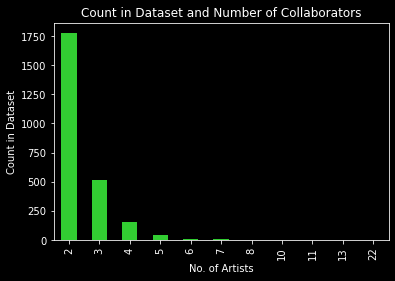

In [162]:
count_collaborators = (
    collab_data.drop_duplicates("Track Name")
    .groupby(["No. of Artists"])
    .count()
    .reset_index()
    .sort_values(by="No. of Artists", ascending= True)
    .plot.bar(x="No. of Artists", y="Track URI2", color = main_color)
)

count_collaborators.set_facecolor(bg_color)
count_collaborators.get_legend().remove()
count_collaborators.set_xlabel("No. of Artists")
count_collaborators.set_ylabel("Count in Dataset")
count_collaborators.set_title("Count in Dataset and Number of Collaborators")

#### Position

Text(0.5, 1.0, 'Average Position and Number of Collaborators')

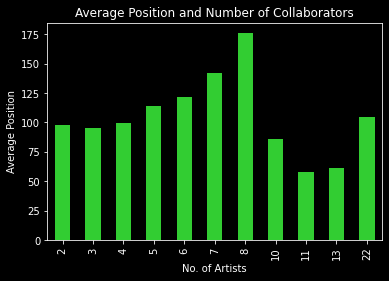

In [163]:
position_collaborators = (
    collab_data.drop_duplicates("Track Name")
    .groupby(["No. of Artists"])["Position"]
    .mean()
    .reset_index(name="Position")
    .sort_values(by="No. of Artists", ascending= True)
    .plot.bar(x="No. of Artists", y="Position", color = main_color)
)
position_collaborators.set_facecolor(bg_color)
position_collaborators.get_legend().remove()
position_collaborators.set_xlabel("No. of Artists")
position_collaborators.set_ylabel("Average Position")
position_collaborators.set_title("Average Position and Number of Collaborators")

#### Streams

Text(0.5, 1.0, 'Average Streams and Number of Collaborators')

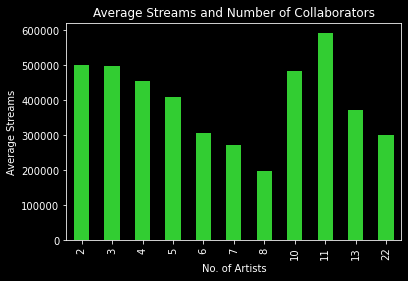

In [164]:
streams_collaborators = (
    collab_data.drop_duplicates("Track Name")
    .groupby(["No. of Artists"])["Streams"]
    .mean()
    .reset_index(name="Streams")
    .sort_values(by="No. of Artists", ascending= True)
    .plot.bar(x="No. of Artists", y="Streams", color = main_color)
)
streams_collaborators.set_facecolor(bg_color)
streams_collaborators.get_legend().remove()
streams_collaborators.set_xlabel("No. of Artists")
streams_collaborators.set_ylabel("Average Streams")
streams_collaborators.set_title("Average Streams and Number of Collaborators")

#### Revenue

Text(0.5, 1.0, 'Average Revenue and Number of Collaborators')

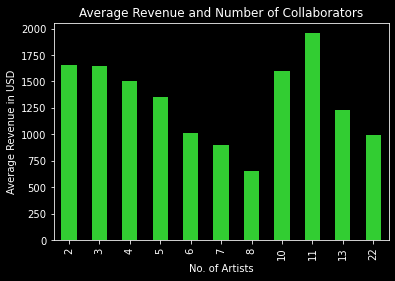

In [165]:
revenue_collaborators = (
    collab_data.drop_duplicates("Track Name")
    .groupby(["No. of Artists"])["Revenue"]
    .mean()
    .reset_index(name="Revenue")
    .sort_values(by="No. of Artists", ascending= True)
    .plot.bar(x="No. of Artists", y="Revenue", color = main_color)
)
revenue_collaborators.set_facecolor(bg_color)
revenue_collaborators.get_legend().remove()
revenue_collaborators.set_xlabel("No. of Artists")
revenue_collaborators.set_ylabel("Average Revenue in USD")
revenue_collaborators.set_title("Average Revenue and Number of Collaborators")

### Genre Metrics

Things to consider here:
- Average may be affecting which genres are in the top. 
- We could potentially do some other data manipulation here to make artificial graphs. 
    - Do some data processing to decide on top 5 and then just display those genres... artifical static data. 
- Also, we have duplicated data due to artists appearing multiple times based on their genres... 
    - Not sute how to fix this due to the fundamental nature of our data collection. 


#### Count

Text(0.5, 1.0, 'Top 5 Genres and Count in Dataset')

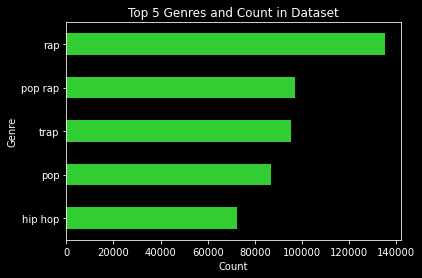

In [166]:
count_genres = (
    collab_genres
    .groupby(["Artist Genre"])
    .count()
    .reset_index()
    .sort_values(by="Artist Name", ascending= False)
    .head(5)
    .plot.barh(x="Artist Genre", y="Artist Name", color = main_color)
)

count_genres.set_facecolor(bg_color)
count_genres.get_legend().remove()
count_genres.invert_yaxis()
count_genres.set_xlabel("Count")
count_genres.set_ylabel("Genre")
count_genres.set_title("Top 5 Genres and Count in Dataset")

#### Position

Text(0.5, 1.0, 'Top 5 Genres and Average Position')

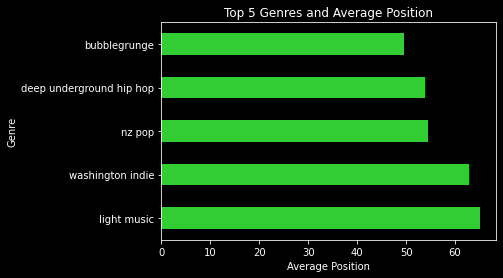

In [167]:
position_genres = (
    collab_genres
    .groupby(["Artist Genre"])["Position"]
    .mean()
    .reset_index(name="Position")
    .sort_values(by="Position", ascending= True)
    .head(5)
    .plot.barh(x="Artist Genre", y="Position", color = main_color)
)
position_genres.set_facecolor(bg_color)
position_genres.get_legend().remove()
position_genres.invert_yaxis()
position_genres.set_xlabel("Average Position")
position_genres.set_ylabel("Genre")
position_genres.set_title("Top 5 Genres and Average Position")

#### Streams

Text(0.5, 1.0, 'Top 5 Genres and Average Streams')

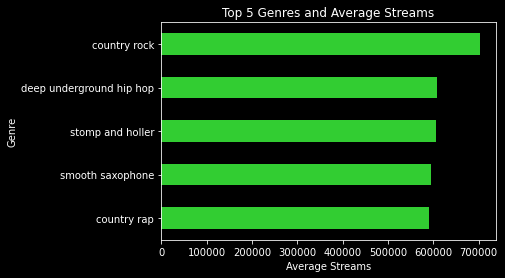

In [168]:
streams_genres = (
    collab_genres.groupby(["Artist Genre"])["Streams"]
    .mean()
    .reset_index(name="Streams")
    .sort_values(by="Streams", ascending= False)
    .head(5)
    .plot.barh(x="Artist Genre", y="Streams", color = main_color)
)
streams_genres.set_facecolor(bg_color)
streams_genres.get_legend().remove()
streams_genres.invert_yaxis()
streams_genres.set_xlabel("Average Streams")
streams_genres.set_ylabel("Genre")
streams_genres.set_title("Top 5 Genres and Average Streams")

#### Revenue

Text(0.5, 1.0, 'Top 5 Genres and Average Revenue')

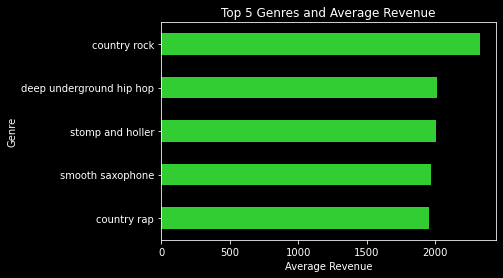

In [169]:
revenue_genres = (
    collab_genres.groupby(["Artist Genre"])["Revenue"]
    .mean()
    .reset_index(name="Revenue")
    .sort_values(by="Revenue", ascending= False)
    .head(5)
    .plot.barh(x="Artist Genre", y="Revenue", color = main_color)
)
revenue_genres.set_facecolor(bg_color)
revenue_genres.get_legend().remove()
revenue_genres.invert_yaxis()
revenue_genres.set_xlabel("Average Revenue")
revenue_genres.set_ylabel("Genre")
revenue_genres.set_title("Top 5 Genres and Average Revenue")

### Position And Metrics

#### Streams and Position

Text(0.5, 1.0, 'Position Compared to Streams')

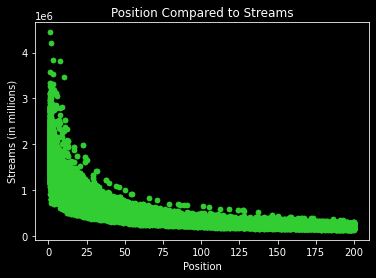

In [170]:
streams_position = (
    collab_data
    .plot.scatter(x="Position", y="Streams", color=main_color)
)
streams_position.set_xlabel("Position")
streams_position.set_ylabel("Streams (in millions)")
streams_position.set_facecolor(bg_color)
streams_position.set_title("Position Compared to Streams")

#### Profit and Position

Text(0.5, 1.0, 'Position Compared to Revenue')

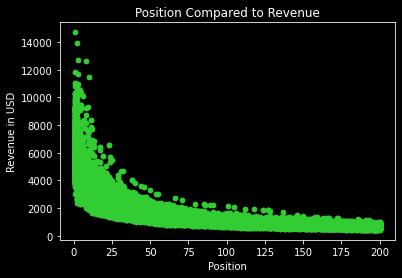

In [171]:
revenue_position = (
    collab_data
    .plot.scatter(x="Position", y="Revenue", color=main_color)
)
revenue_position.set_xlabel("Position")
revenue_position.set_ylabel("Revenue in USD") 
revenue_position.set_facecolor(bg_color)
revenue_position.set_title("Position Compared to Revenue")

#### Streams and Position - Average

Text(0.5, 1.0, 'Position Compared to Average Streams')

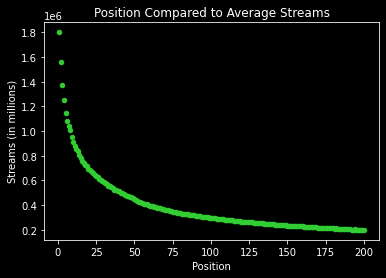

In [172]:
average_streams_position = (
    collab_data.groupby(["Position"])["Streams"]
    .mean()
    .reset_index()
    .plot.scatter(x="Position", y="Streams", color=main_color)
)
average_streams_position.set_xlabel("Position")
average_streams_position.set_ylabel("Streams (in millions)")
average_streams_position.set_facecolor(bg_color)
average_streams_position.set_title("Position Compared to Average Streams")

#### Revenue and Position - Average

Text(0.5, 1.0, 'Position Compared To Average Revenue')

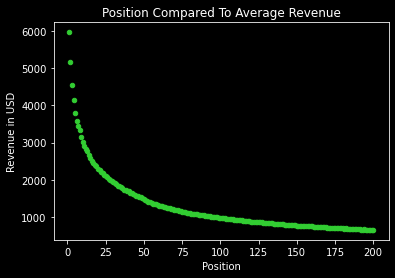

In [173]:
average_revenue_position = (
    collab_data.groupby(["Position"])["Revenue"]
    .mean()
    .reset_index()
    .plot.scatter(x="Position", y="Revenue", color=main_color)
)
average_revenue_position.set_xlabel("Position")
average_revenue_position.set_ylabel("Revenue in USD") 
average_revenue_position.set_facecolor(bg_color)
average_revenue_position.set_title("Position Compared To Average Revenue")

### Look Out For In Future

Will be added in Dash. 

## Page 2

### Top Collabs

Will be added in Dash.

### Track Profit Over Time

#### Revenue

In [181]:
temp_revenue_top15 = (
    collab_data.groupby(['Track URI2'])['Revenue']
    .mean()
    .reset_index()
    .sort_values(by='Revenue', ascending = False)
    .head(15)
)

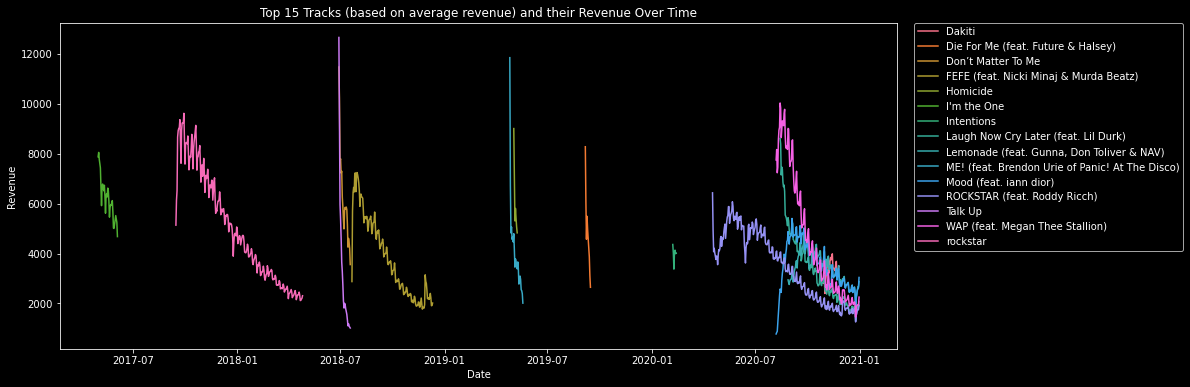

In [183]:
top15_revenue_overtime = (
    collab_data[collab_data['Track URI2'].isin(list(temp_revenue_top15['Track URI2']))]
    .groupby(['Track Name', 'Date'])['Revenue']
    .mean()
    .reset_index()
)

plt.figure(figsize=(15, 6))
sns.lineplot(x="Date", y="Revenue", hue='Track Name', data=top15_revenue_overtime)
plt.title('Top 15 Tracks (based on average revenue) and their Revenue Over Time')
plt.ylabel('Revenue')
plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0)
plt.show()

### Top Tracks Over Time

#### Position

In [185]:
temp_position_top15 = (
    collab_data.groupby(['Track URI2'])['Position']
    .mean()
    .reset_index()
    .sort_values(by='Position', ascending = True)
    .head(15)
)

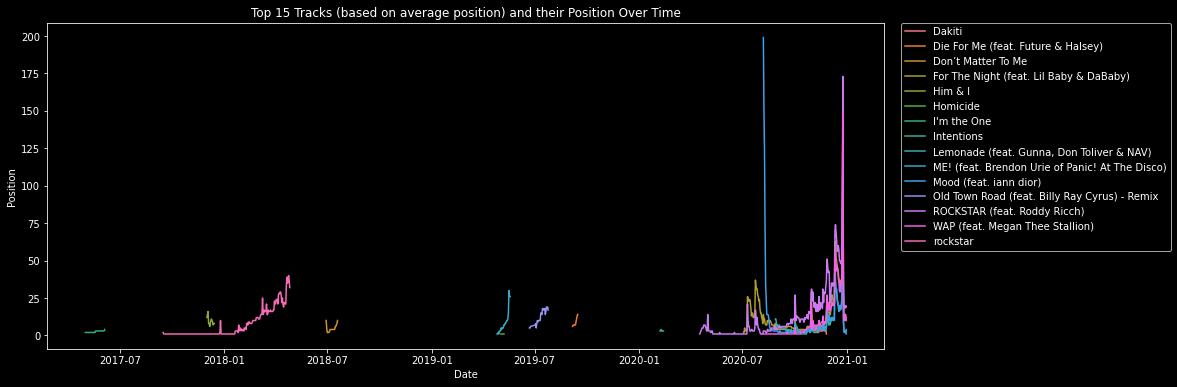

In [186]:
top15_position_overtime = (
    collab_data[collab_data['Track URI2'].isin(list(temp_position_top15['Track URI2']))]
    .groupby(['Track Name', 'Date'])['Position']
    .mean()
    .reset_index()
)

plt.figure(figsize=(15, 6))
sns.lineplot(x="Date", y="Position", hue='Track Name', data=top15_position_overtime)
plt.title('Top 15 Tracks (based on average position) and their Position Over Time')
plt.ylabel('Position')
plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0)
plt.show()

#### Streams

In [187]:
temp_streams_top15 = (
    collab_data.groupby(['Track URI2'])['Streams']
    .mean()
    .reset_index()
    .sort_values(by='Streams', ascending = False)
    .head(15)
)

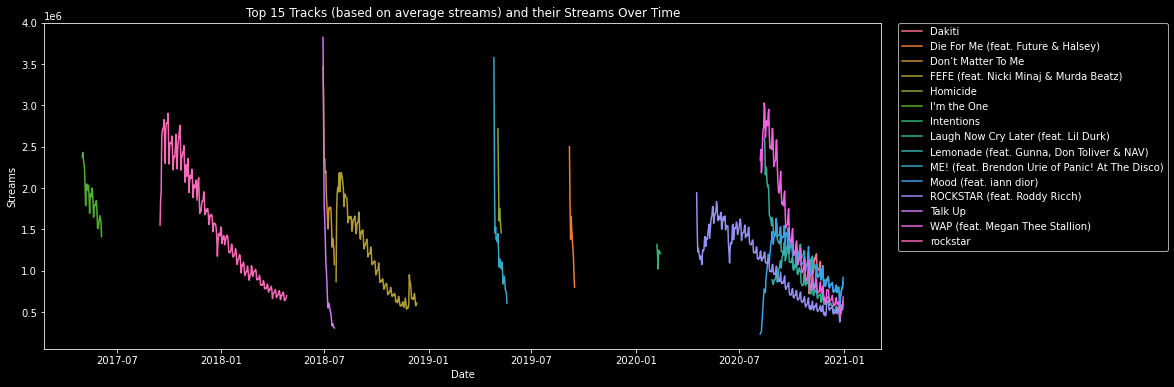

In [189]:
top15_streams_overtime = (
    collab_data[collab_data['Track URI2'].isin(list(temp_streams_top15['Track URI2']))]
    .groupby(['Track Name', 'Date'])['Streams']
    .mean()
    .reset_index()
)

plt.figure(figsize=(15, 6))
sns.lineplot(x="Date", y="Streams", hue='Track Name', data=top15_streams_overtime)
plt.title('Top 15 Tracks (based on average streams) and their Streams Over Time')
plt.ylabel('Streams')
plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0)
plt.show()

## Page 3

### Top Artists

#### Count

Text(0.5, 1.0, 'Top 5 Artists and Count in Dataset')

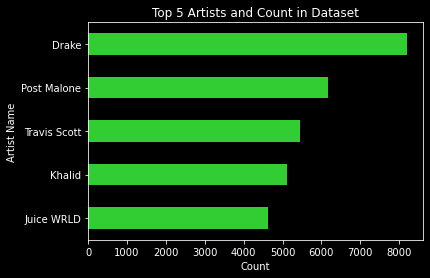

In [143]:
count_artists = (
    collab_data
    .groupby(["Artist Name"])
    .count()
    .reset_index()
    .sort_values(by="Track Name", ascending= False)
    .head(5)
    .plot.barh(x="Artist Name", y="Track Name", color = main_color)
)

#count_artists

count_artists.set_facecolor(bg_color)
count_artists.get_legend().remove()
count_artists.invert_yaxis()
count_artists.set_xlabel("Count")
count_artists.set_ylabel("Artist Name")
count_artists.set_title("Top 5 Artists and Count in Dataset")

#### Position

Text(0.5, 1.0, 'Top 5 Artists and Average Position')

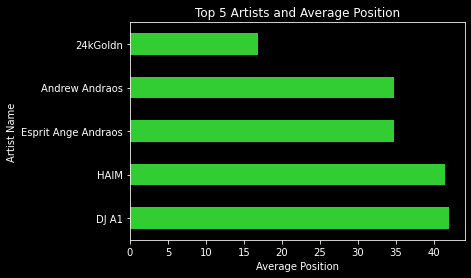

In [140]:
position_artists = (
    collab_data.groupby(["Artist Name"])["Position"]
    .mean()
    .reset_index(name="Position")
    .sort_values(by="Position", ascending= True)
    .head(5)
    .plot.barh(x="Artist Name", y="Position", color = main_color)
)
position_artists.set_facecolor(bg_color)
position_artists.get_legend().remove()
position_artists.invert_yaxis()
position_artists.set_xlabel("Average Position")
position_artists.set_ylabel("Artist Name")
position_artists.set_title("Top 5 Artists and Average Position")

#### Streams

Text(0.5, 1.0, 'Top 5 Artists and Average Streams')

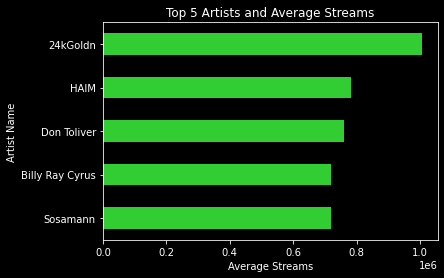

In [138]:
streams_artists = (
    collab_data.groupby(["Artist Name"])["Streams"]
    .mean()
    .reset_index(name="Streams")
    .sort_values(by="Streams", ascending= False)
    .head(5)
    .plot.barh(x="Artist Name", y="Streams", color = main_color)
)
streams_artists.set_facecolor(bg_color)
streams_artists.get_legend().remove()
streams_artists.invert_yaxis()
streams_artists.set_xlabel("Average Streams")
streams_artists.set_ylabel("Artist Name")
streams_artists.set_title("Top 5 Artists and Average Streams")

#### Revenue

Text(0.5, 1.0, 'Top 5 Artists and Average Revenue')

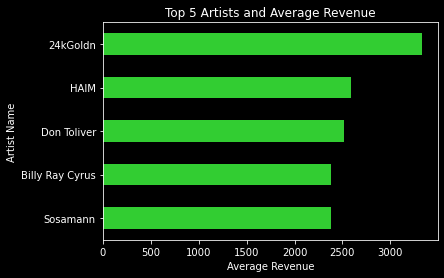

In [137]:
revenue_artists = (
    collab_data.groupby(["Artist Name"])["Revenue"]
    .mean()
    .reset_index(name="Revenue")
    .sort_values(by="Revenue", ascending= False)
    .head(5)
    .plot.barh(x="Artist Name", y="Revenue", color = main_color)
)
revenue_artists.set_facecolor(bg_color)
revenue_artists.get_legend().remove()
revenue_artists.invert_yaxis()
revenue_artists.set_xlabel("Average Revenue")
revenue_artists.set_ylabel("Artist Name")
revenue_artists.set_title("Top 5 Artists and Average Revenue")

### Top Artists in Top Genres

Will be added in Dash. 

### Audio Features

Still in progress will be added in Dash. 

## Page 4

### Track Days On Chart

#### Count

Text(0.5, 1.0, 'Days on the Chart Compared to the Count in the Dataset')

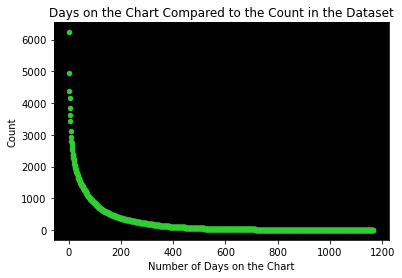

In [45]:
count_trackdays = (
    collab_data
    .groupby(['Song_days_onchart'])
    .count()
    .reset_index()
    .plot.scatter(x="Song_days_onchart", y="Track URI2", color=main_color)
)
#count_trackdays
count_trackdays.set_xlabel("Number of Days on the Chart")
count_trackdays.set_ylabel("Count")
count_trackdays.set_facecolor(bg_color)
count_trackdays.set_title("Days on the Chart Compared to the Count in the Dataset")

#### Position

Text(0.5, 1.0, 'Days on the Chart Compared to the Position')

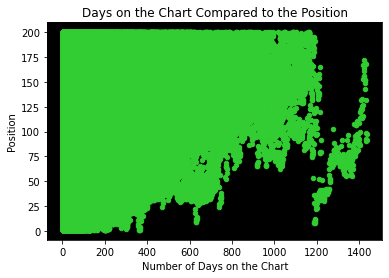

In [23]:
position_trackdays = (
    collab_data
    .plot.scatter(x="Song_days_onchart", y="Position", color=main_color)
)
position_trackdays.set_xlabel("Number of Days on the Chart")
position_trackdays.set_ylabel("Position")
position_trackdays.set_facecolor(bg_color)
position_trackdays.set_title("Days on the Chart Compared to the Position")

#### Streams

Text(0.5, 1.0, 'Days on the Chart Compared to the Number of Streams')

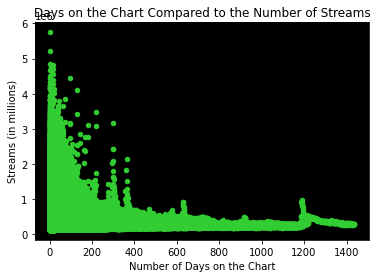

In [24]:
streams_trackdays = (
    collab_data
    .plot.scatter(x="Song_days_onchart", y="Streams", color=main_color)
)
streams_trackdays.set_xlabel("Number of Days on the Chart")
streams_trackdays.set_ylabel("Streams (in millions)")
streams_trackdays.set_facecolor(bg_color)
streams_trackdays.set_title("Days on the Chart Compared to the Number of Streams")

#### Revenue

Text(0.5, 1.0, 'Days on the Chart Compared to Revenue')

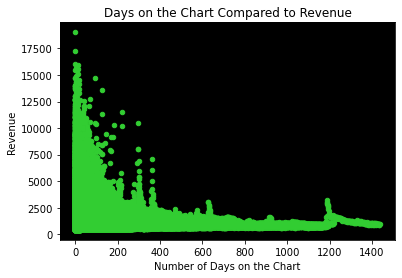

In [25]:
revenue_trackdays = (
    collab_data
    .plot.scatter(x="Song_days_onchart", y="Revenue", color=main_color)
)
revenue_trackdays.set_xlabel("Number of Days on the Chart")
revenue_trackdays.set_ylabel("Revenue in USD")
revenue_trackdays.set_facecolor(bg_color)
revenue_trackdays.set_title("Days on the Chart Compared to Revenue")

#### Position Average

Text(0.5, 1.0, 'Track Days On Chart Compared To Average Position')

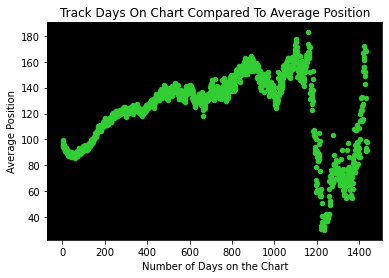

In [26]:
average_position_trackdays = (
    collab_data.groupby(["Song_days_onchart"])["Position"]
    .mean()
    .reset_index()
    .plot.scatter(x="Song_days_onchart", y="Position", color=main_color)
)
average_position_trackdays.set_xlabel("Number of Days on the Chart")
average_position_trackdays.set_ylabel("Average Position") 
average_position_trackdays.set_facecolor(bg_color)
average_position_trackdays.set_title("Track Days On Chart Compared To Average Position")

#### Streams Average

Text(0.5, 1.0, 'Track Days On Chart Compared To Average Streams')

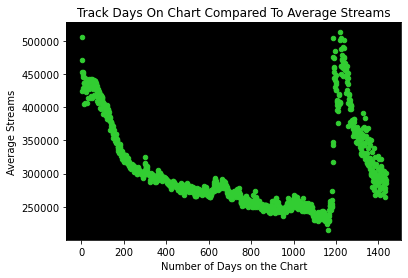

In [27]:
average_streams_trackdays = (
    collab_data.groupby(["Song_days_onchart"])["Streams"]
    .mean()
    .reset_index()
    .plot.scatter(x="Song_days_onchart", y="Streams", color=main_color)
)
average_streams_trackdays.set_xlabel("Number of Days on the Chart")
average_streams_trackdays.set_ylabel("Average Streams") 
average_streams_trackdays.set_facecolor(bg_color)
average_streams_trackdays.set_title("Track Days On Chart Compared To Average Streams")

#### Revenue Average

Text(0.5, 1.0, 'Track Days On Chart Compared To Average Revenue')

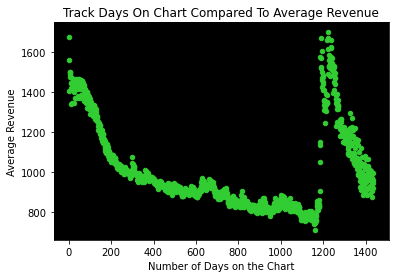

In [29]:
average_revenue_trackdays = (
    collab_data.groupby(["Song_days_onchart"])["Revenue"]
    .mean()
    .reset_index()
    .plot.scatter(x="Song_days_onchart", y="Revenue", color=main_color)
)
average_revenue_trackdays.set_xlabel("Number of Days on the Chart")
average_revenue_trackdays.set_ylabel("Average Revenue") 
average_revenue_trackdays.set_facecolor(bg_color)
average_revenue_trackdays.set_title("Track Days On Chart Compared To Average Revenue")

### Artist Days On Chart

#### Position

In [ ]:
Artist_days_onchart

Text(0.5, 1.0, 'Artist Days on the Chart Compared to the Position')

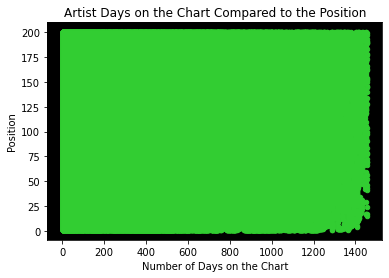

In [30]:
position_artistdays = (
    collab_data
    .plot.scatter(x="Artist_days_onchart", y="Position", color=main_color)
)
position_artistdays.set_xlabel("Number of Days on the Chart")
position_artistdays.set_ylabel("Position")
position_artistdays.set_facecolor(bg_color)
position_artistdays.set_title("Artist Days on the Chart Compared to the Position")

#### Streams

Text(0.5, 1.0, 'Artist Days on the Chart Compared to Streams')

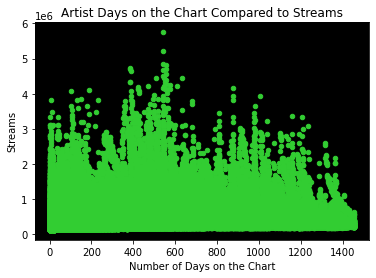

In [34]:
streams_artistdays = (
    collab_data
    .plot.scatter(x="Artist_days_onchart", y="Streams", color=main_color)
)
streams_artistdays.set_xlabel("Number of Days on the Chart")
streams_artistdays.set_ylabel("Streams")
streams_artistdays.set_facecolor(bg_color)
streams_artistdays.set_title("Artist Days on the Chart Compared to Streams")

#### Revenue

Text(0.5, 1.0, 'Artist Days on the Chart Compared to Revenue')

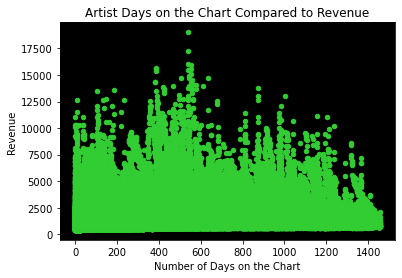

In [35]:
revenue_artistdays = (
    collab_data
    .plot.scatter(x="Artist_days_onchart", y="Revenue", color=main_color)
)
revenue_artistdays.set_xlabel("Number of Days on the Chart")
revenue_artistdays.set_ylabel("Revenue")
revenue_artistdays.set_facecolor(bg_color)
revenue_artistdays.set_title("Artist Days on the Chart Compared to Revenue")

#### Position Average

Text(0.5, 1.0, 'Artist Days On Chart Compared To Average Position')

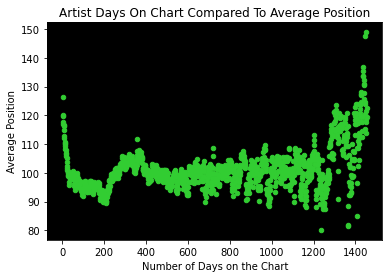

In [31]:
average_position_artistdays = (
    collab_data.groupby(["Artist_days_onchart"])["Position"]
    .mean()
    .reset_index()
    .plot.scatter(x="Artist_days_onchart", y="Position", color=main_color)
)
average_position_artistdays.set_xlabel("Number of Days on the Chart")
average_position_artistdays.set_ylabel("Average Position") 
average_position_artistdays.set_facecolor(bg_color)
average_position_artistdays.set_title("Artist Days On Chart Compared To Average Position")

#### Streams Average

Text(0.5, 1.0, 'Artist Days On Chart Compared To Average Streams')

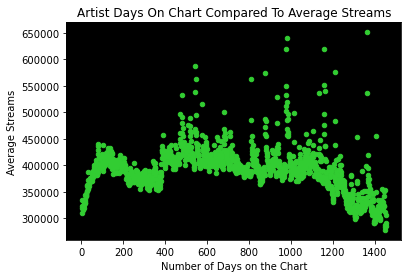

In [32]:
average_streams_artistdays = (
    collab_data.groupby(["Artist_days_onchart"])["Streams"]
    .mean()
    .reset_index()
    .plot.scatter(x="Artist_days_onchart", y="Streams", color=main_color)
)
average_streams_artistdays.set_xlabel("Number of Days on the Chart")
average_streams_artistdays.set_ylabel("Average Streams") 
average_streams_artistdays.set_facecolor(bg_color)
average_streams_artistdays.set_title("Artist Days On Chart Compared To Average Streams")

#### Revenue Average

Text(0.5, 1.0, 'Artist Days On Chart Compared To Average Revenue')

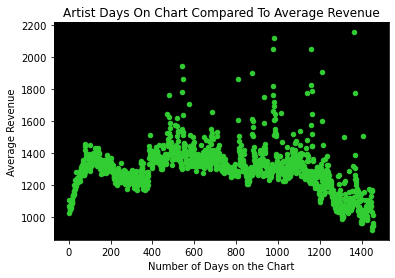

In [33]:
average_revenue_artistdays = (
    collab_data.groupby(["Artist_days_onchart"])["Revenue"]
    .mean()
    .reset_index()
    .plot.scatter(x="Artist_days_onchart", y="Revenue", color=main_color)
)
average_revenue_artistdays.set_xlabel("Number of Days on the Chart")
average_revenue_artistdays.set_ylabel("Average Revenue") 
average_revenue_artistdays.set_facecolor(bg_color)
average_revenue_artistdays.set_title("Artist Days On Chart Compared To Average Revenue")

### Combined Artist Days On Chart

#### Position

#### Streams

#### Revenue

## Page 5

### Album Release Factors - Month

#### Count

Text(0.5, 1.0, 'Release Month and Count in Dataset')

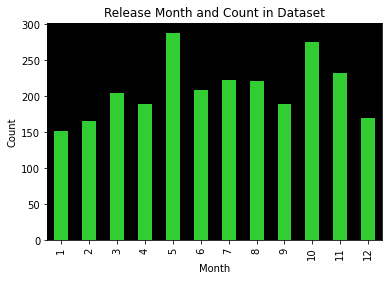

In [60]:
count_month = (
    collab_data.drop_duplicates('Track Name')
    .groupby(['Album_release_month'])
    .count()
    .reset_index()
    .sort_values(by='Album_release_month', ascending = True)
    .plot.bar(x= "Album_release_month", y = "Track URI2", color = main_color)  
)

count_month.get_legend().remove()
count_month.set_xlabel("Month")
count_month.set_ylabel("Count")
count_month.set_facecolor(bg_color)
count_month.set_title("Release Month and Count in Dataset") 

#### Position

Text(0.5, 1.0, 'Release Month and Chart Position')

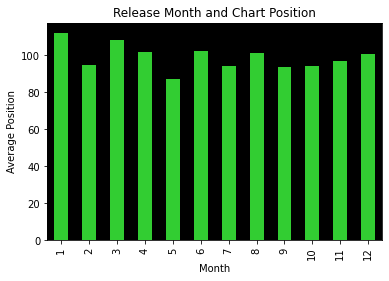

In [55]:
position_month = (
    collab_data.drop_duplicates('Track Name')
    .groupby(['Album_release_month'])['Position']
    .mean()
    .reset_index()
    .sort_values(by='Album_release_month', ascending = True)
    .plot.bar(x= "Album_release_month", y = "Position", color = main_color)  
)

position_month.get_legend().remove()
position_month.set_xlabel("Month")
position_month.set_ylabel("Average Position")
position_month.set_facecolor(bg_color)
position_month.set_title("Release Month and Chart Position") 

#### Streams

Text(0.5, 1.0, 'Release Month and Streams')

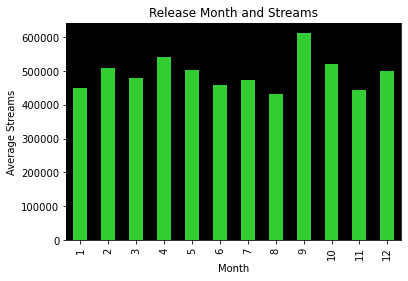

In [56]:
streams_month = (
    collab_data.drop_duplicates('Track Name')
    .groupby(['Album_release_month'])['Streams']
    .mean()
    .reset_index()
    .sort_values(by='Album_release_month', ascending = True)
    .plot.bar(x= "Album_release_month", y = "Streams", color = main_color)  
)

streams_month.get_legend().remove()
streams_month.set_xlabel("Month")
streams_month.set_ylabel("Average Streams")
streams_month.set_facecolor(bg_color)
streams_month.set_title("Release Month and Streams") 

#### Revenue

Text(0.5, 1.0, 'Release Month and Revenue')

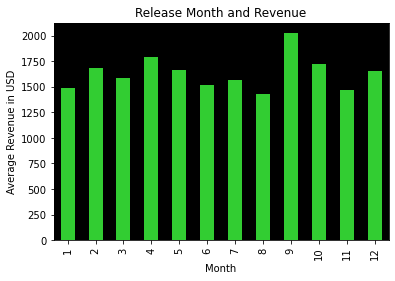

In [57]:
revenue_month = (
    collab_data.drop_duplicates('Track Name')
    .groupby(['Album_release_month'])['Revenue']
    .mean()
    .reset_index()
    .sort_values(by='Album_release_month', ascending = True)
    .plot.bar(x= "Album_release_month", y = "Revenue", color = main_color)  
)

revenue_month.get_legend().remove()
revenue_month.set_xlabel("Month")
revenue_month.set_ylabel("Average Revenue in USD")
revenue_month.set_facecolor(bg_color)
revenue_month.set_title("Release Month and Revenue") 

### Album Release Factors - Week

In [78]:
collab_data['Album_release_dayweek'] = pd.Categorical(collab_data['Album_release_dayweek'],
                                                      categories=['Mon', 'Tue', 'Wed', 
                                                                  'Thu', 'Fri', 'Sat', 'Sun'],
                                                      ordered=True)

#### Count

Text(0.5, 1.0, 'Release Day and Count in Dataset')

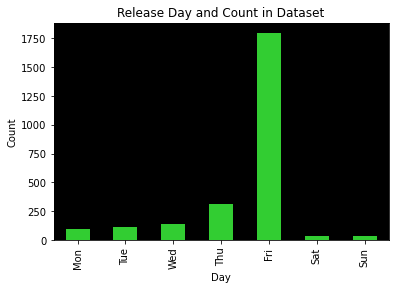

In [83]:
count_week = (
    collab_data.drop_duplicates('Track Name')
    .groupby(['Album_release_dayweek'])
    .count()
    .reset_index()
    .sort_values(by='Album_release_dayweek', ascending = True)
    .plot.bar(x= 'Album_release_dayweek', y = "Track URI2", color = main_color)  
)

count_week.get_legend().remove()
count_week.set_xlabel("Day")
count_week.set_ylabel("Count")
count_week.set_facecolor(bg_color)
count_week.set_title("Release Day and Count in Dataset") 

#### Position

Text(0.5, 1.0, 'Release Day and Chart Position')

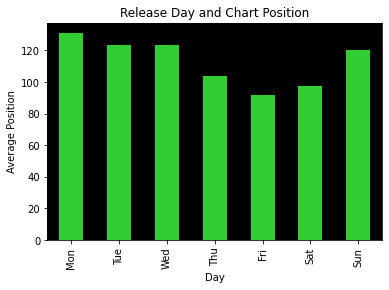

In [84]:
position_week = (
    collab_data.drop_duplicates('Track Name')
    .groupby(['Album_release_dayweek'])['Position']
    .mean()
    .reset_index()
    .sort_values(by='Album_release_dayweek', ascending = True)
    .plot.bar(x= 'Album_release_dayweek', y = "Position", color = main_color)  
)

position_week.get_legend().remove()
position_week.set_xlabel("Day")
position_week.set_ylabel("Average Position")
position_week.set_facecolor(bg_color)
position_week.set_title("Release Day and Chart Position") 

#### Streams

Text(0.5, 1.0, 'Release Day and Streams')

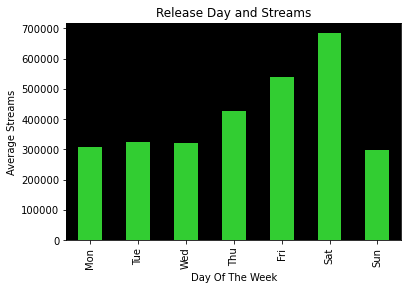

In [81]:
streams_week = (
    collab_data.drop_duplicates('Track Name')
    .groupby(['Album_release_dayweek'])['Streams']
    .mean()
    .reset_index()
    .sort_values(by='Album_release_dayweek', ascending = True)
    .plot.bar(x= 'Album_release_dayweek', y = 'Streams', color = main_color)  
)

streams_week.get_legend().remove()
streams_week.set_xlabel("Day Of The Week")
streams_week.set_ylabel("Average Streams")
streams_week.set_facecolor(bg_color)
streams_week.set_title("Release Day and Streams") 

#### Revenue

Text(0.5, 1.0, 'Release Day and Revenue')

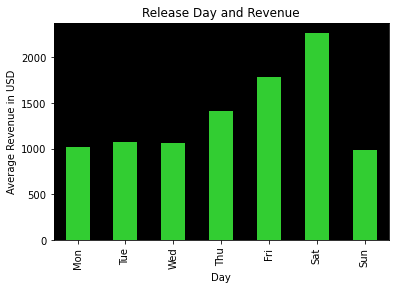

In [82]:
revenue_week = (
    collab_data.drop_duplicates('Track Name')
    .groupby(['Album_release_dayweek'])['Revenue']
    .mean()
    .reset_index()
    .sort_values(by='Album_release_dayweek', ascending = True)
    .plot.bar(x= 'Album_release_dayweek', y = "Revenue", color = main_color)  
)

revenue_week.get_legend().remove()
revenue_week.set_xlabel("Day")
revenue_week.set_ylabel("Average Revenue in USD")
revenue_week.set_facecolor(bg_color)
revenue_week.set_title("Release Day and Revenue") 